# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle

### ~ 1.1
### Your code here! ###
articles_path = './data/articles.tsv.gz'
topics_path = './data/topics.jsonl.gz'
mapping_path = './data/mapping.pickle'

# read articles
articles = pd.read_csv(articles_path, compression='gzip', sep='\t', error_bad_lines=False) # line 7 will be droped here as it is not tab-seperated for the first three counts

# read topics
topics = pd.read_json(topics_path, compression='gzip', lines='true')

# read mapping
mapping = pd.read_pickle(mapping_path)

b'Skipping line 7: expected 944 fields, saw 945\n'


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [2]:
### ~ 2.1
### Your code here! ###

# We drop the lines that startswith 'Discussione:'
articles = articles.drop(articles[articles['index'].str.startswith('Discussione:')].index)

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [3]:
topics

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
0,Chinese_food_therapy,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Battle_of_Naissus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Smooth_newt,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606,Banca_Akros,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35607,Arms_Around_You,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35608,Gioventù_bruciata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35609,Power_Rangers:_Battle_for_the_Grid,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
### ~ 3.1.1
### Your code here! ###

# Print the number of different articles.
titles = articles['index'].unique()
print("There are "+str(len(titles))+" articles.") 

# get rid of the first column which is the title(index)
topic_names = topics.columns[1:] 
print("There are "+str(len(topic_names))+" different topics.")

# print names of topics
print('\n')
print("Names of the topics:")
for topic in topic_names:
    print(topic)

There are 55791 articles.
There are 64 different topics.


Names of the topics:
Geography.Regions.Asia.Central Asia
Geography.Regions.Europe.Eastern Europe
History and Society.Military and warfare
Culture.Media.Television
History and Society.Education
Culture.Media.Books
Geography.Regions.Africa.Africa*
Culture.Visual arts.Architecture
Culture.Biography.Women
Geography.Regions.Americas.North America
STEM.STEM*
Culture.Performing arts
Culture.Literature
History and Society.Politics and government
Geography.Regions.Africa.Northern Africa
STEM.Earth and environment
Geography.Regions.Africa.Central Africa
STEM.Medicine & Health
STEM.Libraries & Information
Geography.Regions.Europe.Europe*
Geography.Regions.Europe.Western Europe
Culture.Media.Radio
STEM.Space
Culture.Visual arts.Comics and Anime
STEM.Technology
Culture.Internet culture
Culture.Media.Software
Geography.Regions.Asia.East Asia
Geography.Regions.Europe.Southern Europe
STEM.Biology
Culture.Food and drink
History and Society.Busi

In [48]:
### ~ 3.1.2
### Your code here! ###

# We calculate the average daily number of pageviews for each articles in the dataset
Aver_pvs_daily_articles = articles.mean(axis = 1)

# We sum them up to get the average daily number of pageviews in the dataset
Aver_pvs_daily = Aver_pvs_daily_articles.sum()
print(Aver_pvs_daily)

324267.67126192997


In [50]:
Aver_pvs_daily_articles.head()

0    1.066808
1    3.533404
2    1.427359
3    0.678685
4    0.714740
dtype: float64

### Discussion for task 3.1.3

We are asked to estimate roughtly what percentage of Italian Wikipedia articles are in my dataset by comparing our daily average pageview numbers with the official statistics in the given website.

We have a formula to estimate it:

    DAPV = N * DAPV_Art, 
    
where DAPV stands for total daily average pageviews, N stands for the number of articles, DAPV_Art stands for the daily average pageviews of each articles. 

We assume that our articles are drawn randomly from the Wikipedia, and we have a large number of articles in our dataset(about 55,000). Thus, by the law of large numbers, we know that the daily average pageviews of each articles is similar between articles in our dataset and articles in wiki.

Then we can calculate:

    DAPV_Data    N_Data * DAPV_Art_Data     N_Data 
    ---------- = ----------------------- = --------    , where
    DAPV_Wiki    N_Wiki * DAPV_Art_Wiki     N_Wiki
    
DAPV_Data means the DAPV of our dataset, N_Data means the N of our dataset, DAPV_Art_Data means the DAPV_Art of our dataset,

DAPV_Wiki means the DAPV of Wikipidia  , N_Wiki means the N of Wikipidia  , DAPV_Art_Wiki means the DAPV_Art of Wikipidia  .

In the given website, set the date range from 2018-01-01 to 2020-07-31, we see that the the DAPV_Wiki is 5,731,987. The DAPV of our dataset is calculated in the previous question, which is Aver_pvs_daily. Hence we can estimate the percentage by

                  N_Data    DAPV_Data       330,388 
    Percentage = -------- = ----------  = ----------- = 5.76%
                  N_Wiki    DAPV_Wiki      5,731,987


### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [6]:
### ~ 3.2.1
### Your code here! ###

# Find articles contain "virus" (case insensitive)
virus_articles = articles[articles['index'].str.contains("virus", case=False)]

# Find articles that have at least 7,000 pageviews
virus_articles_significant = virus_articles[virus_articles.sum(axis=1) >= 7000]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

### ~ 3.2.2
### Your code here! ###

# transform our data into datetune objects
virus_articles_significant_resetindex = virus_articles_significant.set_index('index')
virus_articles_significant_resetindex.columns = pd.to_datetime(virus_articles_significant_resetindex.columns)


# preprocess the data to get least noise

step = 7 # count average page view over every 7 days
date_columns = virus_articles_significant_resetindex.columns
total_days = len(date_columns)

# copy the dataframe
preprocessed_data = virus_articles_significant_resetindex.copy()

# drop all the columns
preprocessed_data = preprocessed_data.drop(date_columns, axis = 1) 

# calculate the rolling 7-days average of the pageviews 
for i in range(total_days-step+1):
    sub = virus_articles_significant_resetindex.iloc[:, i:i+7] 
    preprocessed_data[date_columns[i]]=sub.sum(axis=1)/7


In [8]:
preprocessed_data

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,18.857143,22.428571,22.857143,24.857143,23.428571,22.571429,23.142857,22.714286,21.142857,19.428571,...,9.142857,9.000000,9.428571,9.857143,10.142857,10.285714,10.571429,9.714286,9.000000,8.285714
Malattia_da_virus_Ebola,14.857143,16.000000,15.428571,16.142857,15.428571,12.428571,12.857143,13.142857,15.428571,16.857143,...,81.428571,66.285714,64.571429,77.857143,62.428571,60.285714,75.285714,58.571429,59.857143,77.142857
Influenzavirus_A_sottotipo_H1N1,81.285714,98.857143,106.285714,107.857143,115.428571,120.000000,113.571429,79.571429,67.000000,66.000000,...,35.571429,34.142857,32.000000,37.571429,39.285714,38.714286,39.714286,39.428571,40.571429,42.571429
Rhinovirus,13.571429,15.285714,16.714286,17.142857,15.571429,16.142857,15.714286,13.714286,13.571429,12.428571,...,10.571429,10.714286,10.142857,11.142857,11.000000,10.428571,10.142857,10.142857,10.000000,10.571429
Virus_(informatica),61.857143,71.571429,76.857143,90.285714,107.571429,118.428571,122.714286,122.571429,125.142857,123.571429,...,33.142857,32.000000,28.714286,28.714286,31.000000,27.714286,26.428571,27.428571,25.142857,24.571429
Herpesvirus_umano_3,7.714286,9.142857,10.000000,10.000000,9.285714,9.285714,8.714286,9.714286,9.714286,10.857143,...,9.000000,9.285714,9.428571,9.285714,9.714286,9.000000,8.857143,8.142857,8.142857,7.857143
Antivirus,28.428571,33.428571,35.428571,43.142857,54.857143,54.000000,53.714286,55.428571,52.714286,52.000000,...,21.857143,23.285714,23.571429,23.142857,22.857143,22.142857,20.571429,21.571429,20.000000,18.142857
Virus_respiratorio_sinciziale_umano,13.000000,15.142857,16.000000,16.142857,17.428571,17.714286,17.142857,17.857143,17.142857,17.000000,...,9.857143,9.571429,9.285714,8.857143,8.000000,7.714286,7.428571,7.571429,6.857143,6.428571


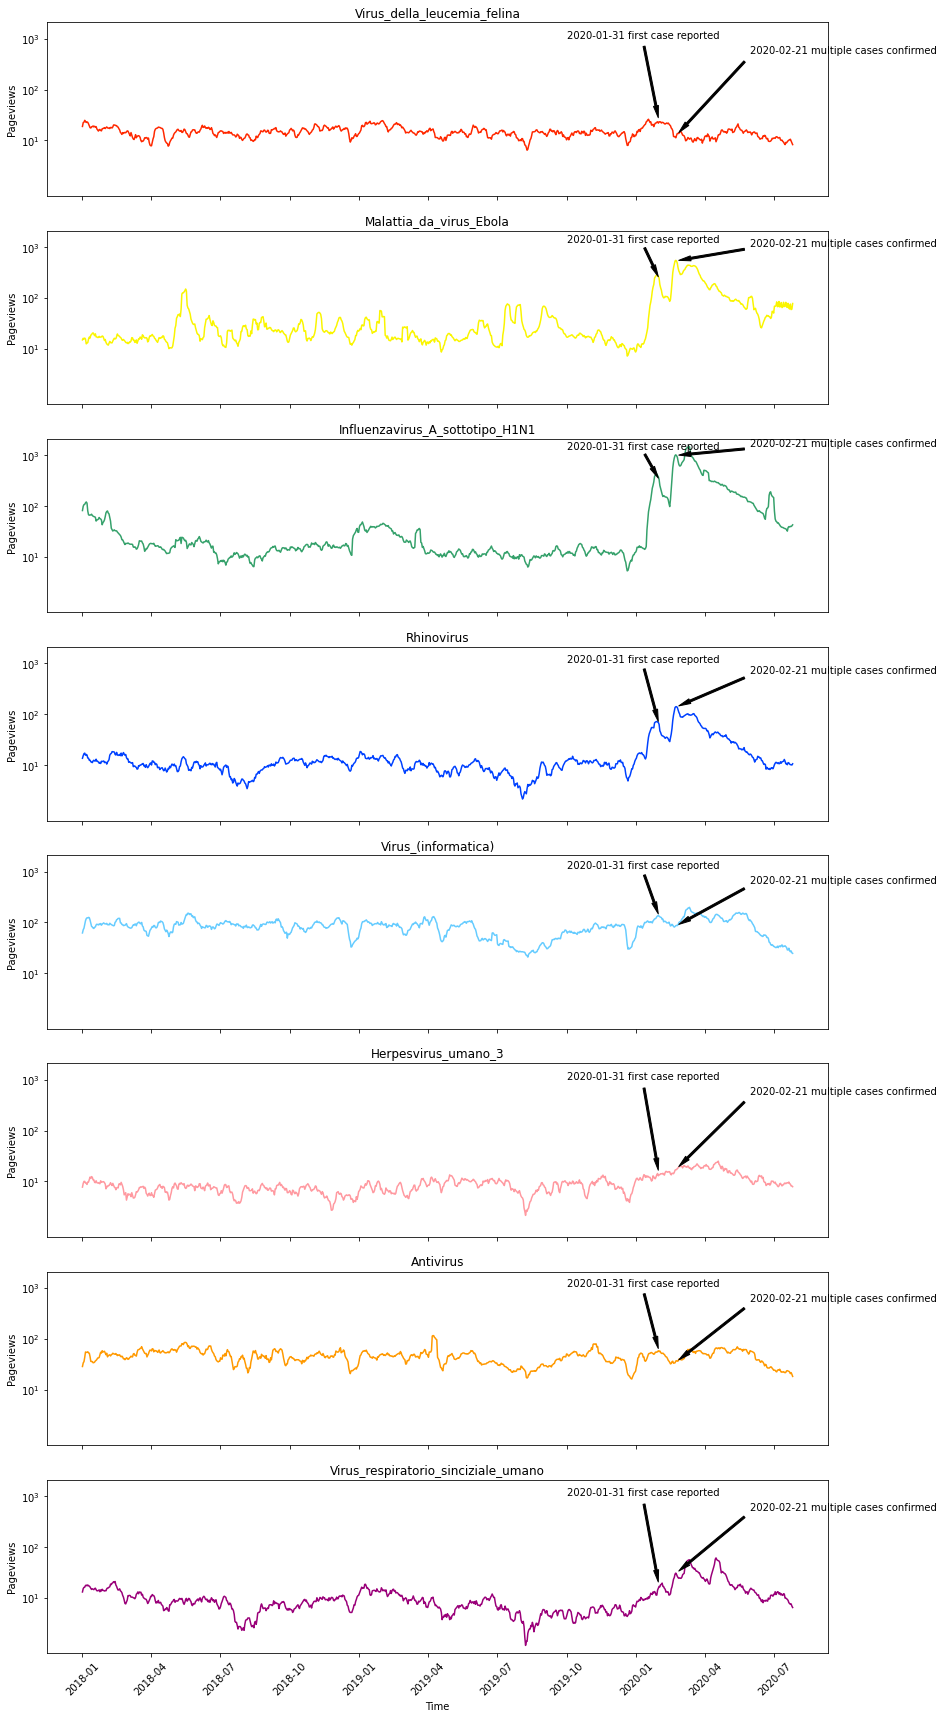

In [9]:
# plot graph

# get title for panel title and for locate row
titles = list(preprocessed_data.index)

# highlight points
t0=pd.to_datetime('2020-01-31')
t1=pd.to_datetime('2020-02-21')
y0=preprocessed_data[t0]
y1=preprocessed_data[t1]

# plot the data
axs = plt.figure(figsize=(14,30)).subplots(len(titles), 1, sharey = True, sharex = True)
plt.xticks(rotation=45)
plt.yscale('symlog')
plt.xlabel('Time')

# We use colors that are color blinder friendely.
#Red #FF2800, Yellow #FAF500, Green #35A16B, Blue #0041FF, 
#Sky Blue ##0041FF, Pink #FF99A0, Orange #FF9900, Purple #9A0079
colors = ['#FF2800','#FAF500','#35A16B','#0041FF','#66CCFF','#FF99A0','#FF9900','#9A0079']

for ax, t, c in zip(axs.flat, titles, colors):
    row = (preprocessed_data.loc[t])
    ax.plot(row,color=c)  
    ax.set_title(t)
    ax.set_ylabel('Pageviews')
    
    # highlight two dates
    ax.annotate('2020-01-31 first case reported', xy=(t0, y0[t]), xytext=(pd.to_datetime('2019-10-01'), y0[t]+1000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))
    ax.annotate('2020-02-21 multiple cases confirmed', xy=(t1, y1[t]), xytext=(pd.to_datetime('2020-05-30'), y1[t]+500),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))
    

###  Discussion for 3.2.3

We found that there are four articles have evident peaks about pageviews. Their titles are Malattia_da_virus_Ebola, Influenzavirus_A_sottotipo_H1N1, Rhinovirus, Virus_respiratorio_sinciziale_umano,respectively. For the other four articles, there are nothing worth mentioning.  Summarize them we found that the articles have peaks have great impact on human or similar to flu, like Ebola, H1N1 and Rhinovirus, while other four articles don't have such features.


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

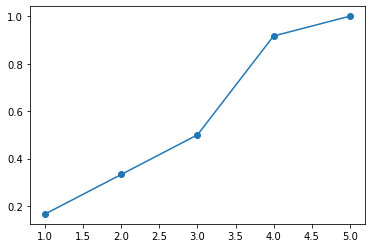

In [10]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y, 'o-')
plt.show()

In [11]:
### ~ 3.3.1
### Your code here! ###

# calculate the total number of pageviews each article has received 
total_PV = articles.sum(axis=1)

# calculate the CDF for these values.
x, y = get_cdf(total_PV)

# check the result simply
y

array([0.        , 0.        , 0.        , ..., 0.99998208, 0.99998208,
       1.        ])

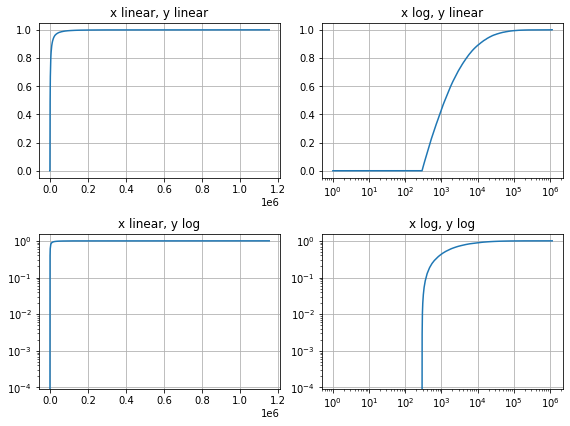

In [12]:
### ~ 3.3.2
### Your code here! ###
plt.figure(figsize=(8, 6))
# x-axis on linear scale, y-axis on linear scale
plt.subplot(221)
plt.plot(x, y)

# label the axes
plt.xscale('linear')
plt.yscale('linear')
plt.title('x linear, y linear')
plt.grid(True)

# x-axis on log scale, y-axis on linear scale
plt.subplot(222)
plt.plot(x, y)

# label the axes
plt.xscale('log')
plt.yscale('linear')
plt.title('x log, y linear')
plt.grid(True)

# x-axis on linear scale, y-axis on log scale
plt.subplot(223)
plt.plot(x, y)

# label the axes
plt.xscale('linear')
plt.yscale('log')
plt.title('x linear, y log')
plt.grid(True)

#x-axis on log scale, y-axis on log scale
plt.subplot(224)
plt.plot(x, y)

#label the axes
plt.xscale('log')
plt.yscale('log')
plt.title('x log, y log')
plt.grid(True)

# plot
plt.tight_layout(pad=1.0)

In [13]:
### ~ 3.3.3
### Your text here! ###

# From the graph x log, y linear and graph x log, y log, it can be seen that the line 
# is always 0 for some x =[0, n] (100<n<1000), and then it starts to increase drastically.
# It is weird as the pageview of articales should be random and supposed to have some articles with less than n pageviews.
# We guess that articles may be filtered based on the number of pageview, and only articles 
# greater than or equal to n will be selected.
# Then we verify the assumption.
articles.sum(axis=1).sort_values(ascending=[True])
# We find in the period(2018-1-1 to 2020-7-31), the minimum total pageview of a article is 291.
# So, n=291.



# We can only found this result in the plot(b). In plot (a) and plot(c), the x-axis is linear. As most of the articles have pageview 
#less than 10,000 and the largest pageview is more than 100,000, we cannot see clearly the relationship between x and y. In plot(d),
# the y-axis is log. As y range in 0 to 1, we cannot see the change clearly after y greater than 0.1.

55594        291
13222        291
18336        291
1432         291
1201         291
          ...   
46115     458204
23599     630950
46587    1126418
28158    1150589
36516    1152767
Length: 55791, dtype: int64

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

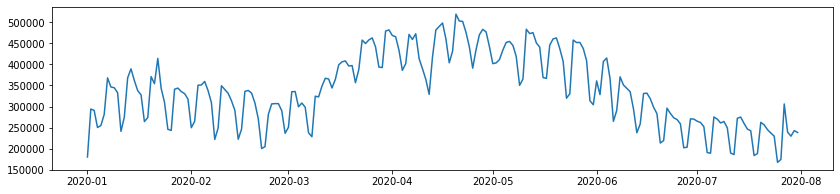

In [14]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.1
### Your code here! ###

# change the datatype to datetime
articles_resetindex = articles.set_index('index')
articles_resetindex.columns = pd.to_datetime(articles_resetindex.columns)

# select dates only in 2020
mask_2020 = (articles_resetindex.columns >= pd.to_datetime('2020-1-1')) & (articles_resetindex.columns <= pd.to_datetime('2020-7-31'))
articles_2020 = articles_resetindex[articles_resetindex.columns[mask_2020]]

# sum them up and plot it
articles_2020_sum = articles_2020.sum()
plt.plot(articles_2020.columns, articles_2020_sum)

### Discussion for  4.1.2


 We found that the total pageview of Italian wiki have some small fluctuations every 7 days under the general trend.
 After verification, the trough appear in 2020-1-4, 2020-1-5, 2020-1-11, 2020-1-12, 2020-1 -18, 2020-1-19... they are 
 all Saturday and Sunday. We guess that due to people do not work on weekends, the pageviews of the wiki articles decrease.
 

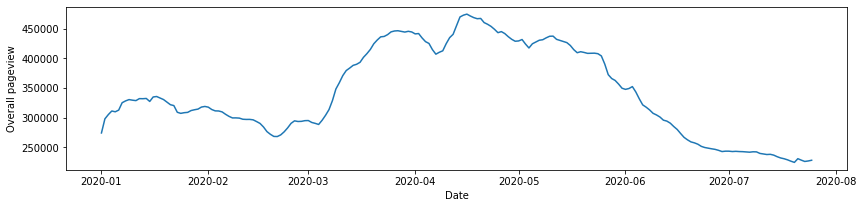

In [15]:
plt.figure(figsize=(14,3)) # change this if needed
plt.xlabel('Date')
plt.ylabel('Overall pageview')
### ~ 4.1.3
### Your code here! ###

#preprocess data in 2020
# As discussed above, we decide to use 7-days rolling averge 

step = 7 # count average page view over every 7 days
total_days_2020 = len(articles_2020.columns)

# calculate the 7-days rolling average
preprocessed_data_2020 = []
for i in range(total_days_2020-step+1):
    sub = articles_2020.iloc[:, i:i+7] 
    preprocessed_data_2020.append(sub.sum().sum()/7)

# plot it
plt.plot(articles_2020.iloc[:, :-6].columns, preprocessed_data_2020)

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

In [16]:
### ~ 4.2.1
## Your code here! ###
 
# preprocess data in 2019, similar setting to the previous question
mask_2019 = (articles_resetindex.columns >= pd.to_datetime('2019-1-1')) & (articles_resetindex.columns <= pd.to_datetime('2019-7-31'))
articles_2019 = articles_resetindex[articles_resetindex.columns[mask_2019]]

total_days_2019 = len(articles_2019.columns)

preprocessed_data_2019 = []
for i in range(total_days_2019-step+1):
    sub = articles_2019.iloc[:, i:i+7] 
    preprocessed_data_2019.append(sub.sum().sum()/7)

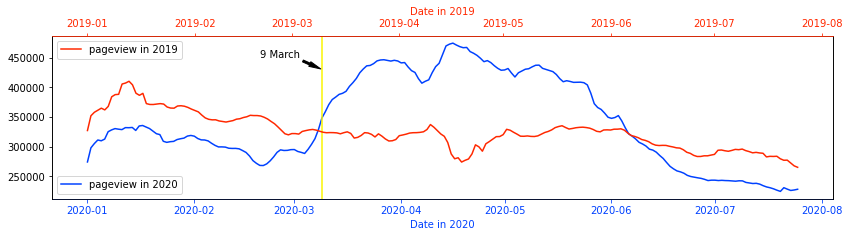

In [17]:
# plot the graph     
fig, ax1 = plt.subplots(figsize=(14,3))

# label the graph and choose color blinder friendly color
ax1.plot(articles_2020.iloc[:, :-6].columns, preprocessed_data_2020, color='#0041FF', label='pageview in 2020')
ax1.set_xlabel('Date in 2020', color='#0041FF')
ax1.spines['bottom'].set_color('#0041FF')
ax1.xaxis.label.set_color('#0041FF')
ax1.tick_params(axis='x', colors='#0041FF')
ax1.legend(loc='lower left')

# highlight 2020-3-9
ax1.axvline(x=pd.to_datetime('2020-03-09'),color ='#FAF500')
ax1.annotate('9 March', xy=(pd.to_datetime('2020-03-09'), 430000), xytext=(pd.to_datetime('2020-02-20'), 450000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))

ax2 = ax1.twiny()
ax2.plot(articles_2019.iloc[:, :-6].columns, preprocessed_data_2019, color='#FF2800', label='pageview in 2019')
ax2.set_xlabel('Date in 2019', color='#FF2800')
ax2.spines['top'].set_color('#FF2800')
ax2.xaxis.label.set_color('#FF2800')
ax2.tick_params(axis='x', colors='#FF2800')
ax2.legend(loc='upper left')

plt.show()

### ~ 4.2.2
### Your text here! ###

Before 21 Feb, pageview in 2019 and 2020 have similar trends but the pageviews in 2019 is higher than the pageviews in 2020. Later around 9 March , the pageviews in 2020 increase drastically and is higher than the pageviews in 2019. Due to the lockdown, people stay in their home. They had more time to read artciles and concerned about virus, which led to the pageview much higher than previous year during April to June. After June, people get used to the virus and backed to work, which led to the pageview decrease and lower than the pageview of 2019.

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [18]:
### ~ 5.1.1
### Your code here! ###

# melt the data via index
topics_data = pd.melt(topics,id_vars=['index'])

# preserve the rows where value = true
topics_true = topics_data[topics_data['value']].drop(columns=['value'])

# rename columns
topics_true = topics_true.rename(columns={'index':'article_name','variable':'topic_name'})

# map the name from english to italian
topics_true['article_name'] = topics_true['article_name'].map(mapping)

# merge two datasets via title names
temp_views = pd.merge(articles, topics_true, how='right',right_on="article_name", left_on="index")

# drop the article_name
temp_views = temp_views.drop(columns=['article_name'])

# calculate the total pageview of each topics each day
temp_views = temp_views.groupby("topic_name").sum()

# reset the index
temp_views = temp_views.reset_index()
temp_views

,topic_name,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Culture.Biography.Biography*,58085,86933,88693,94648,90808,73282,83489,98398,102231,...,54600,53177,57053,42743,43668,121292,59043,56121,61911,75470
1,Culture.Biography.Women,12370,17811,17743,20312,19309,16267,17900,20594,20570,...,10868,10716,10776,8714,10370,11680,11901,10841,12839,24281
2,Culture.Food and drink,2093,3788,3956,4149,3863,3230,3669,4777,5164,...,2605,2543,2293,1613,1592,2438,2542,2336,2510,2179
3,Culture.Internet culture,6441,10743,11252,10813,10144,8427,9316,11617,11749,...,8384,8408,7437,5218,5014,7660,7049,6988,7177,6640
4,Culture.Linguistics,1606,3565,3488,3696,3465,2934,2906,3625,4113,...,4080,2937,2043,1451,1712,3860,2837,2361,2507,1951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,STEM.Medicine & Health,5574,13943,13461,13875,12648,10412,12575,17123,18438,...,9987,8939,8092,6070,5993,9149,8684,8146,8153,7144
60,STEM.Physics,2203,5345,5804,6412,5817,4473,5598,7240,8172,...,4200,3992,3491,2553,2367,3652,3638,3276,3151,2728
61,STEM.STEM*,28743,60495,63281,66305,61418,47546,57522,78656,83208,...,48457,46732,42458,27656,27335,44887,42971,41555,44924,38000
62,STEM.Space,1310,2262,2376,2642,2337,2193,2864,2765,3000,...,1619,1552,1375,1260,1189,1446,1509,1422,1901,1537


In [19]:
# melt the data via topic_name
topic_view = pd.melt(temp_views, id_vars=['topic_name'])

# sort the data to make it looks like examples
topic_view = topic_view.sort_values(by=['topic_name','variable'])

# change the datatype to datetime
topic_view['variable']=pd.to_datetime(topic_view['variable'])

# rename dataframe
topic_view = topic_view.rename(columns={"variable": "date", "value": "views"})
topic_view

,topic_name,date,views
0,Culture.Biography.Biography*,2018-01-01,58085
64,Culture.Biography.Biography*,2018-01-02,86933
128,Culture.Biography.Biography*,2018-01-03,88693
192,Culture.Biography.Biography*,2018-01-04,94648
256,Culture.Biography.Biography*,2018-01-05,90808
...,...,...,...
60095,STEM.Technology,2020-07-27,11507
60159,STEM.Technology,2020-07-28,11023
60223,STEM.Technology,2020-07-29,11131
60287,STEM.Technology,2020-07-30,12406


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

In [20]:
import seaborn as sns

### ~ 5.2
### Your code here! ###

# create a function to select certain period
def get_date_list(begin_date,end_date):

    date_list = [x.strftime('%Y-%m-%d') for x in list(pd.date_range(start=begin_date, end=end_date))]

    return date_list

# the 35 days before the quarantine started
time1 = get_date_list('2020-02-03','2020-03-08')

# the 34 days after the quarantined started
time2 = get_date_list('2020-03-09','2020-04-12')


In [21]:
# create a dataframe for the 35 days before the quarantine started
time1_views = topic_view.loc[topic_view['date']=='2020-02-03']
for timei in time1[1:]:
    topic_viewi = topic_view.loc[topic_view['date']==timei]
    time1_views = time1_views.append(topic_viewi)
time1_views

,topic_name,date,views
48832,Culture.Biography.Biography*,2020-02-03,79655
48833,Culture.Biography.Women,2020-02-03,15286
48834,Culture.Food and drink,2020-02-03,3873
48835,Culture.Internet culture,2020-02-03,8629
48836,Culture.Linguistics,2020-02-03,3219
...,...,...,...
51067,STEM.Medicine & Health,2020-03-08,9341
51068,STEM.Physics,2020-03-08,3866
51069,STEM.STEM*,2020-03-08,40996
51070,STEM.Space,2020-03-08,1898


In [22]:
# create a dataframe for 34 days after the quarantine started
time2_views = topic_view.loc[topic_view.date=='2020-03-09']
for timei in time2[1:]:
    topic_viewi = topic_view.loc[topic_view.date==timei]
    time2_views = time2_views.append(topic_viewi)
time2_views

,topic_name,date,views
51072,Culture.Biography.Biography*,2020-03-09,65379
51073,Culture.Biography.Women,2020-03-09,12461
51074,Culture.Food and drink,2020-03-09,3415
51075,Culture.Internet culture,2020-03-09,13270
51076,Culture.Linguistics,2020-03-09,3169
...,...,...,...
53307,STEM.Medicine & Health,2020-04-12,9368
53308,STEM.Physics,2020-04-12,3984
53309,STEM.STEM*,2020-04-12,49088
53310,STEM.Space,2020-04-12,3028


In [23]:
# the mean number of pageviews before 9th of March 
time1_views_mean = time1_views.groupby("topic_name").agg({'views':'mean'}).rename(columns={'views':'mean_views_time1'}).reset_index()
time1_views_mean

,topic_name,mean_views_time1
0,Culture.Biography.Biography*,64463.771429
1,Culture.Biography.Women,12584.057143
2,Culture.Food and drink,3210.714286
3,Culture.Internet culture,8280.885714
4,Culture.Linguistics,2922.857143
...,...,...
59,STEM.Medicine & Health,12457.800000
60,STEM.Physics,5290.828571
61,STEM.STEM*,57515.085714
62,STEM.Space,2050.942857


In [24]:
# the mean number of pageviews after 9th of March
time2_views_mean = time2_views.groupby("topic_name").agg({'views':'mean'}).rename(columns={'views':'mean_views_time2'}).reset_index()
time2_views_mean

,topic_name,mean_views_time2
0,Culture.Biography.Biography*,87902.400000
1,Culture.Biography.Women,17371.828571
2,Culture.Food and drink,4288.771429
3,Culture.Internet culture,15805.542857
4,Culture.Linguistics,3883.228571
...,...,...
59,STEM.Medicine & Health,17006.142857
60,STEM.Physics,7805.057143
61,STEM.STEM*,81295.857143
62,STEM.Space,2989.428571


In [25]:
# merge two dataframe
time_views_mean = pd.merge(time1_views_mean, time2_views_mean, how='left',right_on="topic_name", left_on="topic_name" )
time_views_mean

,topic_name,mean_views_time1,mean_views_time2
0,Culture.Biography.Biography*,64463.771429,87902.400000
1,Culture.Biography.Women,12584.057143,17371.828571
2,Culture.Food and drink,3210.714286,4288.771429
3,Culture.Internet culture,8280.885714,15805.542857
4,Culture.Linguistics,2922.857143,3883.228571
...,...,...,...
59,STEM.Medicine & Health,12457.800000,17006.142857
60,STEM.Physics,5290.828571,7805.057143
61,STEM.STEM*,57515.085714,81295.857143
62,STEM.Space,2050.942857,2989.428571


In [26]:
# calculate the percentage of increase
# define the percentage of increase as (mean_after-mean_before)/(mean_before)
time_views_mean['increase'] = (time_views_mean['mean_views_time2']-time_views_mean['mean_views_time1'])/time_views_mean['mean_views_time1']
time_views_mean_sort = time_views_mean.sort_values(ascending=[False], by=['increase'])
time_views_mean_sort.head(30)

,topic_name,mean_views_time1,mean_views_time2,increase
6,Culture.Media.Books,3718.914286,7723.828571,1.076904
14,Culture.Media.Video games,3126.342857,6003.628571,0.920336
3,Culture.Internet culture,8280.885714,15805.542857,0.908678
5,Culture.Literature,15280.285714,26973.228571,0.765231
12,Culture.Media.Software,7396.428571,12767.571429,0.726181
19,Culture.Visual arts.Comics and Anime,4607.257143,7810.285714,0.695214
8,Culture.Media.Films,20610.628571,34662.171429,0.681762
27,Geography.Regions.Africa.Southern Africa,152.800000,245.285714,0.605273
21,Culture.Visual arts.Visual arts*,15059.514286,23991.828571,0.593134
47,History and Society.History,17117.085714,26997.028571,0.577198


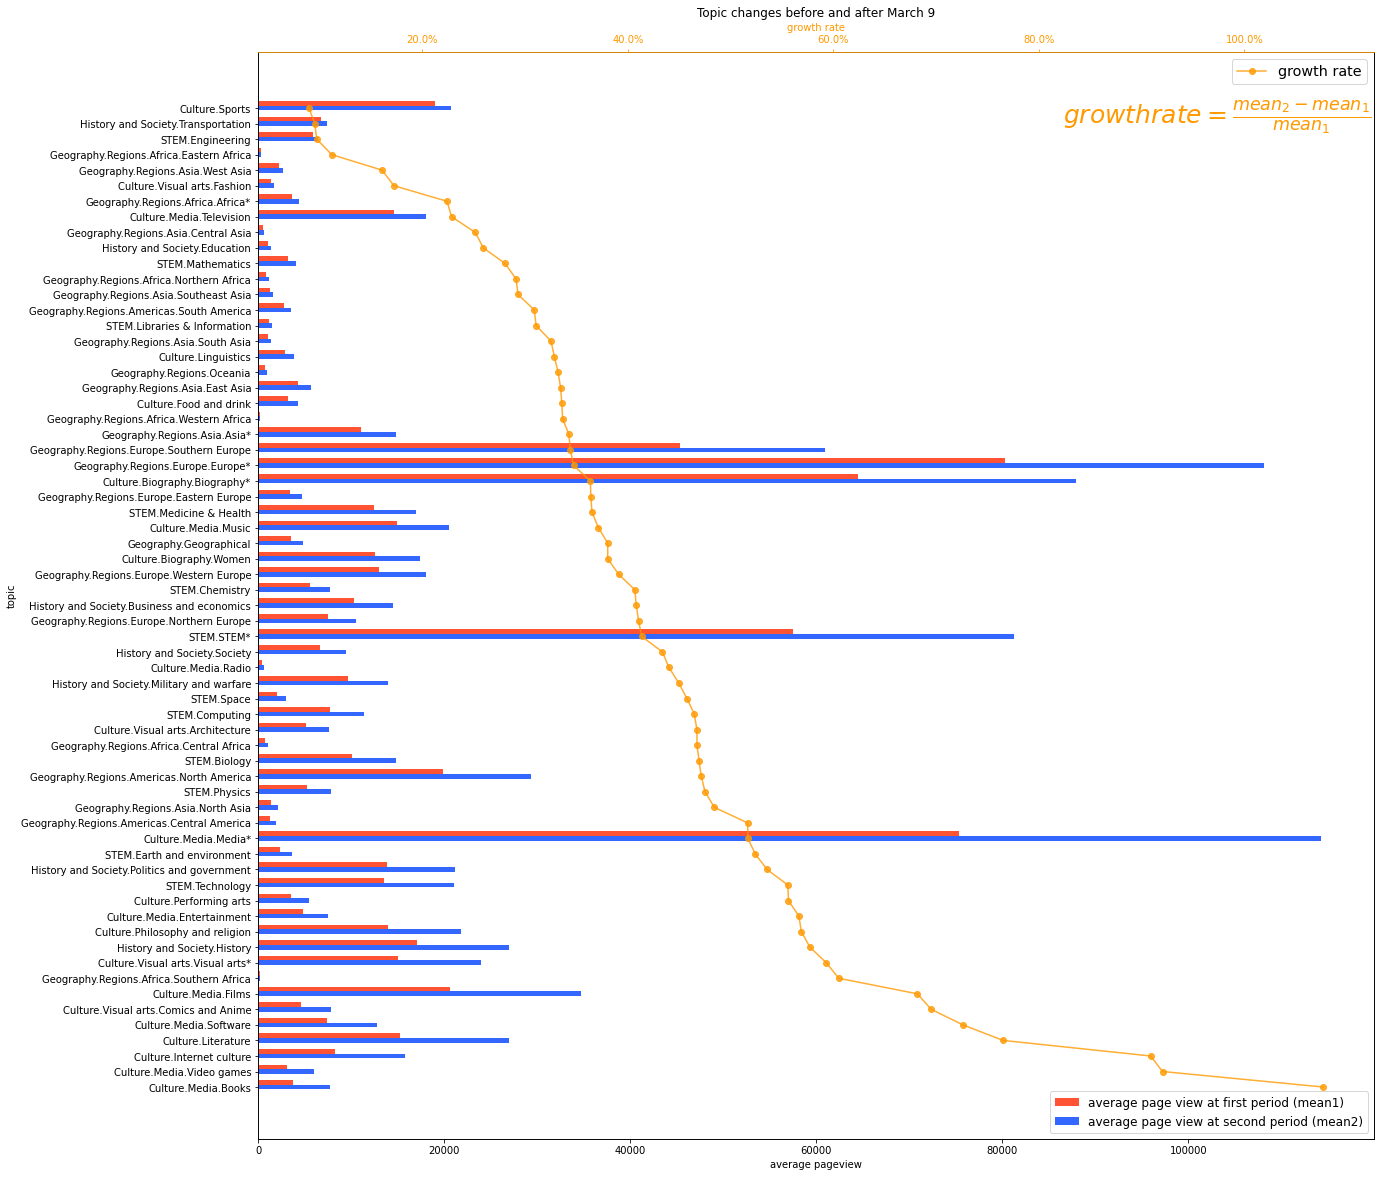

In [27]:
from matplotlib import ticker

# setup of data
x_data = time_views_mean_sort.topic_name
y_data = time_views_mean_sort.mean_views_time1
y_data2 = time_views_mean_sort.mean_views_time2
y_data3 = time_views_mean_sort.increase

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(20,20 ))

bar_width = 0.3

plt.title("Topic changes before and after March 9")

# set scale for y-axis
plt.yticks(np.arange(len(x_data))+bar_width/2, x_data)
plt.ylabel("topic")



# we use (np.arange(len(x_data))+bar_width) for data is y-axis,

# which is bar_width、1+bar_width、2+bar_width...By doing so, we merge it with the first histogram.
ax1.barh(y=np.arange(len(x_data))+bar_width, width=y_data, label='average page view at first period (mean1)', color='#FF2800', alpha=0.8, height=bar_width)

# use range(len(x_data) for data in y-axis, 
ax1.barh(y=range(len(x_data)), width=y_data2, label='average page view at second period (mean2)', color='#0041FF', alpha=0.8, height=bar_width)
ax1.set_xlabel("average pageview")

# show legend
ax1.legend(loc='lower right', fontsize='large')

# set colors and labels
ax2 = ax1.twiny()
ax2.plot(y_data3,x_data,color='#FF9900',marker='o',alpha=0.8,label='growth rate')
ax2.set_xlabel('growth rate',color='#FF9900')
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax2.spines['top'].set_color('#FF9900')
ax2.xaxis.label.set_color('#FF9900')
ax2.tick_params(axis='x', colors='#FF9900')

# show legend
ax2.legend(loc='upper right', fontsize='x-large')

###
a = r'growth rate = \frac{mean_2-mean_1}{mean_1}'
ax1.text(86500, 62, '$%s$' %a, fontsize=25, color='#FF9900')

plt.show()

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [28]:
### ~ 5.3.1
### Your code here! ###

# calculate the sum of day_sum
day_sum = topic_view
day_sum = day_sum[['date','views']]
day_sum = day_sum.groupby("date").sum().reset_index()
day_sum


,date,views
0,2018-01-01,570527
1,2018-01-02,923333
2,2018-01-03,945901
3,2018-01-04,974255
4,2018-01-05,923122
...,...,...
938,2020-07-27,780016
939,2020-07-28,584156
940,2020-07-29,557737
941,2020-07-30,598265


In [29]:
# normalize the data
topic_view_fraction = topic_view.copy()
topic_view_fraction['fraction'] = topic_view_fraction['views']/topic_view_fraction['date'].map(day_sum.set_index('date')['views'])
topic_view_fraction

,topic_name,date,views,fraction
0,Culture.Biography.Biography*,2018-01-01,58085,0.101809
64,Culture.Biography.Biography*,2018-01-02,86933,0.094151
128,Culture.Biography.Biography*,2018-01-03,88693,0.093766
192,Culture.Biography.Biography*,2018-01-04,94648,0.097149
256,Culture.Biography.Biography*,2018-01-05,90808,0.098371
...,...,...,...,...
60095,STEM.Technology,2020-07-27,11507,0.014752
60159,STEM.Technology,2020-07-28,11023,0.018870
60223,STEM.Technology,2020-07-29,11131,0.019957
60287,STEM.Technology,2020-07-30,12406,0.020737


In [30]:
### ~ 5.3.2
### Your code here! ###

#time1_views_fraction
time1_views_fraction = time1_views.copy()
time1_views_fraction['fraction'] = time1_views_fraction['views']/time1_views_fraction['date'].map(day_sum.set_index('date')['views'])

#time2_views_fraction
time2_views_fraction = time2_views.copy()
time2_views_fraction['fraction'] = time2_views_fraction['views']/time2_views_fraction['date'].map(day_sum.set_index('date')['views'])

#time1_views_fraction_sum
time1_views_fraction_sum = time1_views_fraction.groupby("topic_name").agg({'fraction':'mean'}).rename(columns={'fraction':'mean_fraction_time1'}).reset_index()

#time2_views_fraction_sum
time2_views_fraction_sum = time2_views_fraction.groupby("topic_name").agg({'fraction':'mean'}).rename(columns={'fraction':'mean_fraction_time2'}).reset_index()

#time_views_fraction_sum
time_views_fraction_sum = pd.merge(time1_views_fraction_sum, time2_views_fraction_sum, how='left',right_on="topic_name", left_on="topic_name" )

# calculate the proportion
time_views_fraction_sum['increase'] = (time_views_fraction_sum['mean_fraction_time2']-time_views_fraction_sum['mean_fraction_time1'])/time_views_fraction_sum['mean_fraction_time1']
time_views_fraction_sum_sort = time_views_fraction_sum.sort_values(ascending=[False], by=['increase'])
time_views_fraction_sum_sort

,topic_name,mean_fraction_time1,mean_fraction_time2,increase
6,Culture.Media.Books,0.005255,0.007492,0.425570
3,Culture.Internet culture,0.011701,0.015560,0.329733
14,Culture.Media.Video games,0.004473,0.005908,0.320732
5,Culture.Literature,0.021595,0.026337,0.219597
12,Culture.Media.Software,0.010336,0.012542,0.213381
...,...,...,...,...
38,Geography.Regions.Asia.West Asia,0.003148,0.002566,-0.184952
25,Geography.Regions.Africa.Eastern Africa,0.000356,0.000276,-0.223984
56,STEM.Engineering,0.008172,0.006305,-0.228523
51,History and Society.Transportation,0.009416,0.007245,-0.230552


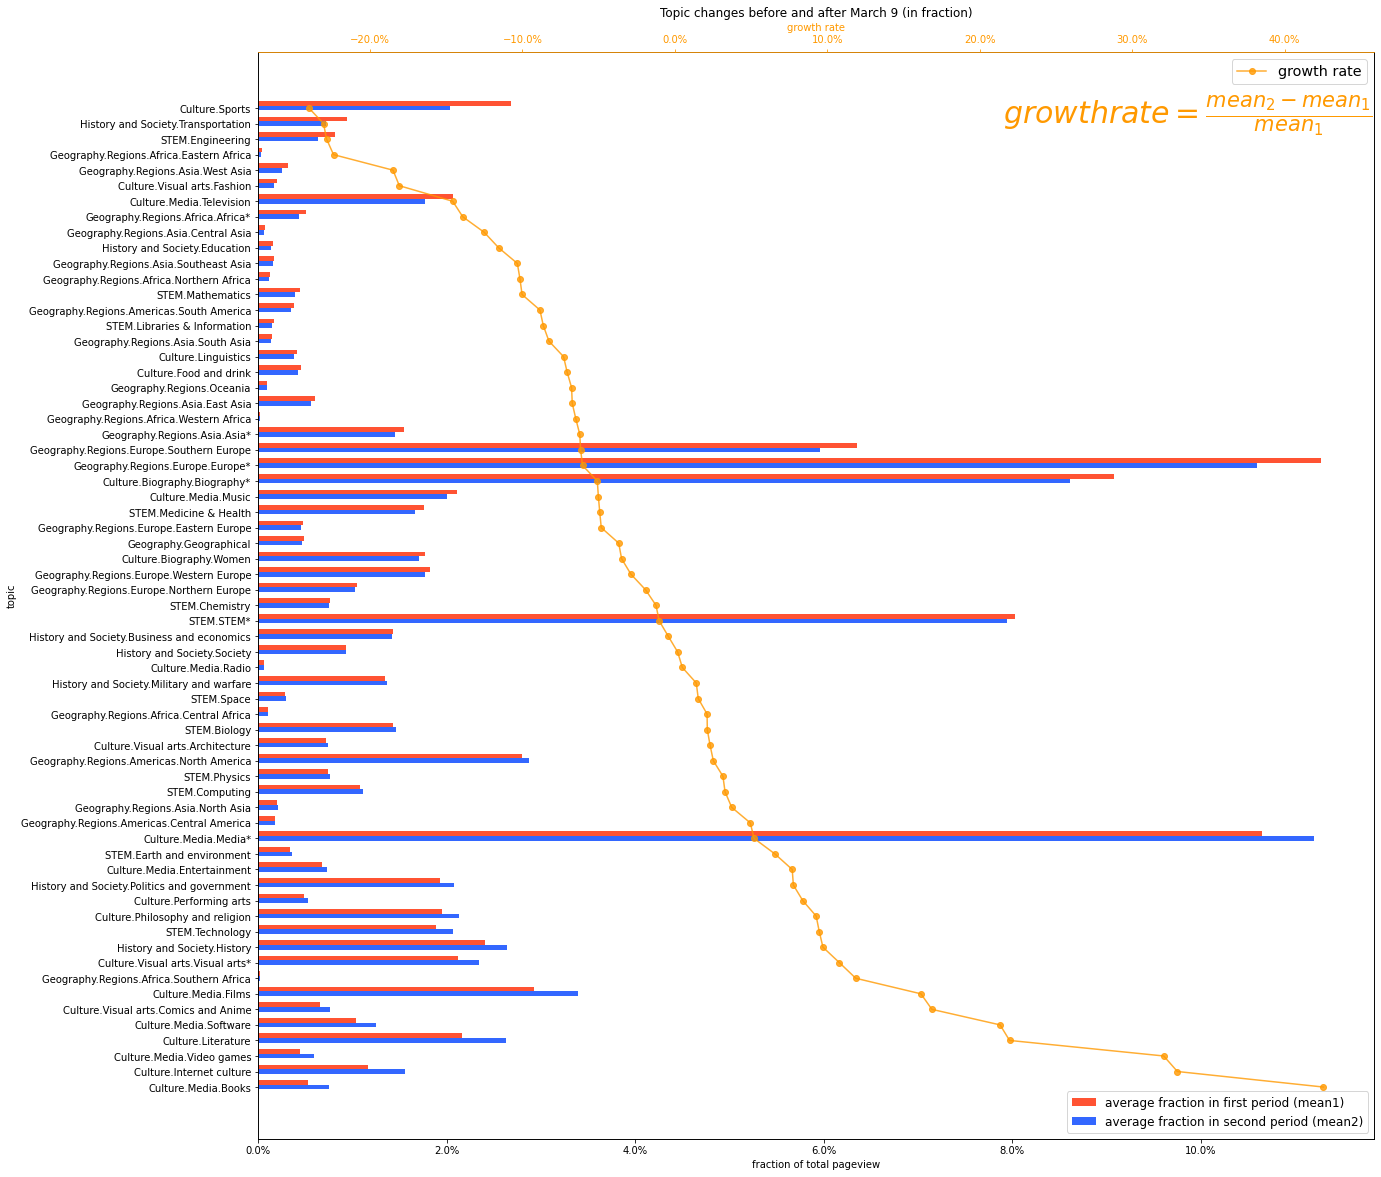

In [44]:
from matplotlib import ticker

# set the x_data topic name
x_data = time_views_fraction_sum_sort.topic_name
#set y_data mean_fraction_time1 of each topic
y_data = time_views_fraction_sum_sort.mean_fraction_time1
#set y_data mean_fraction_time2 of each topic
y_data2 = time_views_fraction_sum_sort.mean_fraction_time2
#set y_data3 increase of each topic
y_data3 = time_views_fraction_sum_sort.increase

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(20,20 ))

# set a title
plt.title("Topic changes before and after March 9 (in fraction)")
# set ylabel
plt.ylabel("topic")
# set scale for y-axis
plt.yticks(np.arange(len(x_data))+bar_width/2, x_data)


# set x axis of fraction of total pageview to percent format.
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
# set bar width 0.3
bar_width = 0.3
# use (np.arange(len(x_data))+bar_width) for Y-axis,
ax1.barh(y=np.arange(len(x_data))+bar_width, width=y_data, label='average fraction in first period (mean1)', color='#FF2800', alpha=0.8, height=bar_width)
#use range(len(x_data) for Y-axis
ax1.barh(y=range(len(x_data)), width=y_data2, label='average fraction in second period (mean2)', color='#0041FF', alpha=0.8, height=bar_width)
#set x label name
ax1.set_xlabel("fraction of total pageview")

# show legend
ax1.legend(loc='lower right', fontsize='large')

# set labels and colors to the plot
ax2 = ax1.twiny()
#FF9900 orange color
ax2.plot(y_data3,x_data,color='#FF9900', marker='o',alpha=0.8,label='growth rate')
ax2.set_xlabel("growth rate",color='#FF9900')
ax2.spines['top'].set_color('#FF9900')
ax2.xaxis.label.set_color('#FF9900')
#change the x-axis to percent format
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax2.tick_params(axis='x', colors='#FF9900')

# show legend
ax2.legend(loc='upper right', fontsize='x-large')
#show the formular of growth rate.
a = r'growth rate = \frac{mean_2-mean_1}{mean_1}'
ax1.text(0.079, 62, '$%s$' %a, fontsize=30, color='#FF9900')

plt.show()

In [32]:
### ~ 5.3.3
### Your text here! ###


time_views_fraction_sum_sort_num=time_views_fraction_sum_sort.reset_index().drop(columns=['index','mean_fraction_time1','mean_fraction_time2'])
time_views_fraction_sum_sort_num.index.name = 'rank_fraction'
time_views_fraction_sum_sort_num =time_views_fraction_sum_sort_num.rename(columns={'increase': 'fraction_increase'})
time_views_fraction_sum_sort_num=time_views_fraction_sum_sort_num.reset_index()
time_views_fraction_sum_sort_num['rank_fraction']=time_views_fraction_sum_sort_num['rank_fraction']+1
time_views_fraction_sum_sort_num.head()

,rank_fraction,topic_name,fraction_increase
0,1,Culture.Media.Books,0.425570
1,2,Culture.Internet culture,0.329733
2,3,Culture.Media.Video games,0.320732
3,4,Culture.Literature,0.219597
4,5,Culture.Media.Software,0.213381


In [33]:
time_views_mean_sort_num=time_views_mean_sort.reset_index().drop(columns=['index','mean_views_time1','mean_views_time2'])
time_views_mean_sort_num.index.name = 'rank_num'
time_views_mean_sort_num =time_views_mean_sort_num.rename(columns={'increase': 'num_increase'})
time_views_mean_sort_num=time_views_mean_sort_num.reset_index()
time_views_mean_sort_num['rank_num']=time_views_mean_sort_num['rank_num']+1
time_views_mean_sort_num.head()

,rank_num,topic_name,num_increase
0,1,Culture.Media.Books,1.076904
1,2,Culture.Media.Video games,0.920336
2,3,Culture.Internet culture,0.908678
3,4,Culture.Literature,0.765231
4,5,Culture.Media.Software,0.726181


---

In [34]:
rank_sum=pd.merge(time_views_fraction_sum_sort_num, time_views_mean_sort_num, how='right',right_on="topic_name", left_on="topic_name")

In [35]:
rank_sum

,rank_fraction,topic_name,fraction_increase,rank_num,num_increase
0,1,Culture.Media.Books,0.425570,1,1.076904
1,3,Culture.Media.Video games,0.320732,2,0.920336
2,2,Culture.Internet culture,0.329733,3,0.908678
3,4,Culture.Literature,0.219597,4,0.765231
4,5,Culture.Media.Software,0.213381,5,0.726181
...,...,...,...,...,...
59,60,Geography.Regions.Asia.West Asia,-0.184952,60,0.160991
60,61,Geography.Regions.Africa.Eastern Africa,-0.223984,61,0.111940
61,62,STEM.Engineering,-0.228523,62,0.097301
62,63,History and Society.Transportation,-0.230552,63,0.095363


In [36]:
rank_sum=rank_sum[['topic_name','num_increase','rank_num','fraction_increase','rank_fraction']]
rank_sum['change']=rank_sum['rank_fraction']-rank_sum['rank_num']
rank_sum[rank_sum.change==0].topic_name
rank_sum

<ipython-input-36-27892748293b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_sum['change']=rank_sum['rank_fraction']-rank_sum['rank_num']


,topic_name,num_increase,rank_num,fraction_increase,rank_fraction,change
0,Culture.Media.Books,1.076904,1,0.425570,1,0
1,Culture.Media.Video games,0.920336,2,0.320732,3,1
2,Culture.Internet culture,0.908678,3,0.329733,2,-1
3,Culture.Literature,0.765231,4,0.219597,4,0
4,Culture.Media.Software,0.726181,5,0.213381,5,0
...,...,...,...,...,...,...
59,Geography.Regions.Asia.West Asia,0.160991,60,-0.184952,60,0
60,Geography.Regions.Africa.Eastern Africa,0.111940,61,-0.223984,61,0
61,STEM.Engineering,0.097301,62,-0.228523,62,0
62,History and Society.Transportation,0.095363,63,-0.230552,63,0


In [37]:
rank_sum.sort_values(by=['change'])

,topic_name,num_increase,rank_num,fraction_increase,rank_fraction,change
24,STEM.Computing,0.464700,25,0.032919,20,-5
13,STEM.Technology,0.555761,14,0.094748,11,-3
31,History and Society.Business and economics,0.408231,32,-0.004286,30,-2
38,Geography.Regions.Europe.Eastern Europe,0.364006,39,-0.048323,37,-2
53,STEM.Mathematics,0.280534,54,-0.100279,52,-2
...,...,...,...,...,...,...
51,Geography.Regions.Asia.Southeast Asia,0.293228,52,-0.103364,54,2
21,STEM.Biology,0.469321,22,0.021273,24,2
22,Geography.Regions.Africa.Central Africa,0.467352,23,0.021136,25,2
30,Geography.Regions.Europe.Northern Europe,0.410511,31,-0.019256,33,2


In [38]:
rank_sum[rank_sum.change>0]

,topic_name,num_increase,rank_num,fraction_increase,rank_fraction,change
1,Culture.Media.Video games,0.920336,2,0.320732,3,1
10,Culture.Philosophy and religion,0.568880,11,0.092704,12,1
11,Culture.Media.Entertainment,0.566470,12,0.077000,15,3
19,STEM.Physics,0.475205,20,0.031528,21,1
20,Geography.Regions.Americas.North America,0.471443,21,0.025220,22,1
21,STEM.Biology,0.469321,22,0.021273,24,2
22,Geography.Regions.Africa.Central Africa,0.467352,23,0.021136,25,2
29,STEM.STEM*,0.413470,30,-0.010294,31,1
30,Geography.Regions.Europe.Northern Europe,0.410511,31,-0.019256,33,2
36,Culture.Media.Music,0.371384,37,-0.050208,39,2


In [39]:
rank_sum[rank_sum.change<0]

,topic_name,num_increase,rank_num,fraction_increase,rank_fraction,change
2,Culture.Internet culture,0.908678,3,0.329733,2,-1
13,STEM.Technology,0.555761,14,0.094748,11,-3
14,History and Society.Politics and government,0.535475,15,0.077734,14,-1
23,Culture.Visual arts.Architecture,0.467228,24,0.023084,23,-1
24,STEM.Computing,0.464700,25,0.032919,20,-5
31,History and Society.Business and economics,0.408231,32,-0.004286,30,-2
32,STEM.Chemistry,0.406846,33,-0.012395,32,-1
38,Geography.Regions.Europe.Eastern Europe,0.364006,39,-0.048323,37,-2
45,Geography.Regions.Asia.East Asia,0.334639,46,-0.067356,45,-1
46,Geography.Regions.Oceania,0.332118,47,-0.067763,46,-1
